In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.transforms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load SA results

In [2]:
df_p = pd.read_csv('SA_results_v7_p.csv')
df_n = pd.read_csv('SA_results_v7_n.csv')

df_p = df_p[['sentence', 'sentiment', 'strength']]
df_n = df_n[['sentence', 'sentiment', 'strength']]

In [3]:
print(len(df_p))
df_p.head(3)

151024


,sentence,sentiment,strength
0,when ordering i was unsure if the holder would...,positive,0.451169
1,very adaptable to all different location mounts.,positive,0.890246
2,"great product, great service.",positive,1.000000


In [4]:
print(len(df_n))
df_n.head(3)

27176


,sentence,sentiment,strength
0,miss leading add it's not useful\nfor anything,negative,0.788803
1,i thought it was a speaker but it's just a lit...,negative,0.963449
2,"love the size and good bass quality, but it do...",negative,0.886279


In [5]:
df_s = df_p.append(df_n)
len(df_s)

178200

# Merge with product features

In [6]:
df_f = pd.read_csv('FSP_without_st.csv')
df_f.drop(columns='Unnamed: 0', inplace=True)
df_f.rename(columns={'FSP':'feature', 'feature':'noun', 'sentiment':'adjective'}, inplace=True)

In [7]:
print(len(df_f))
df_f.head(3)

2269443


,cluster,price,product_name,sentence,feature,noun,adjective
0,3,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...,unsure/i,i,unsure
1,3,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...,unsure/holder,holder,unsure
2,3,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...,unsure/jbl,jbl,unsure


In [8]:
df_fsp = df_f.merge(df_s, on='sentence')
print(len(df_fsp))
df_fsp.head(3)

1773004


,cluster,price,product_name,sentence,feature,noun,adjective,sentiment,strength
0,3,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...,unsure/i,i,unsure,positive,0.451169
1,3,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...,unsure/holder,holder,unsure,positive,0.451169
2,3,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...,unsure/jbl,jbl,unsure,positive,0.451169


In [9]:
# Clean uninformative features

bad_noun = ['i']
bad_adj = ['i']
df_fsp2 = df_fsp[(~df_fsp.noun.isin(bad_noun)) & (~df_fsp.adjective.isin(bad_adj))]

### Calculate average strength

In [10]:
df_avg = df_fsp2.groupby(['cluster', 'feature'])['strength'].mean().to_frame()
df_avg.head(3)

strength
cluster feature                     
0       'acurate/battery    0.085323
        'acurate/dot        0.085323
        'acurate/indicator  0.085323

In [11]:
df_fsp3 = df_fsp2.merge(df_avg, on=['cluster', 'feature'])
df_fsp3.drop(columns='strength_x', inplace=True)
df_fsp3.rename(columns={'strength_y': 'strength'}, inplace=True)
df_fsp3[['cluster', 'feature', 'sentiment', 'strength', 
        'price', 'product_name', 'sentence']]

,cluster,feature,sentiment,strength,price,product_name,sentence
0,3,unsure/holder,positive,0.451169,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...
1,3,unsure/jbl,positive,0.451169,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...
2,3,unsure/speaker,positive,0.734731,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...
3,3,unsure/speaker,positive,0.734731,18.29,Portable Waterproof Bluetooth Speaker with FM ...,"so, i was a bit unsure if this speaker would h..."
4,3,unsure/speaker,positive,0.734731,34.99,iFox iF012 Bluetooth Shower Speaker - Certifie...,if you're unsure which waterproof/resistant bl...
...,...,...,...,...,...,...,...
1571406,4,nice/analog,positive,0.817046,499.00,Vifa Oslo Compact Rechargeable Hi-Resolution B...,"still, the price is a bit offset by the build ..."
1571407,4,nice/tote,positive,0.817046,499.00,Vifa Oslo Compact Rechargeable Hi-Resolution B...,"still, the price is a bit offset by the build ..."
1571408,4,nice/bag,positive,0.817046,499.00,Vifa Oslo Compact Rechargeable Hi-Resolution B...,"still, the price is a bit offset by the build ..."
1571409,4,nice/power,positive,0.817046,499.00,Vifa Oslo Compact Rechargeable Hi-Resolution B...,"still, the price is a bit offset by the build ..."


In [12]:
#df_fsp4 = df_fsp3[['cluster', 'feature', 'sentiment', 'strength', 'price', 'product_name', 'sentence']]
#df_fsp4.to_csv('final_product.csv')

### Correct cluster index

In [13]:
print(df_fsp3[df_fsp3.cluster == 0]['price'].head(1)) #c2
print(df_fsp3[df_fsp3.cluster == 1]['price'].head(1)) #c4
print(df_fsp3[df_fsp3.cluster == 2]['price'].head(1)) #c3
print(df_fsp3[df_fsp3.cluster == 3]['price'].head(1)) #c1
print(df_fsp3[df_fsp3.cluster == 4]['price'].head(1)) #c5

94621    49.99
Name: price, dtype: float64
86704    210.0
Name: price, dtype: float64
95977    99.99
Name: price, dtype: float64
0    7.99
Name: price, dtype: float64
97076    398.0
Name: price, dtype: float64


In [14]:
df_fsp3.loc[df_fsp3.cluster == 0, 'cluster'] = 'c2'
df_fsp3.loc[df_fsp3.cluster == 1, 'cluster'] = 'c4'
df_fsp3.loc[df_fsp3.cluster == 2, 'cluster'] = 'c3'
df_fsp3.loc[df_fsp3.cluster == 3, 'cluster'] = 'c1'
df_fsp3.loc[df_fsp3.cluster == 4, 'cluster'] = 'c5'

# Weight FSP

In [15]:
df_fsp_p = df_fsp3[df_fsp3.sentiment == 'positive']
df_fsp_n = df_fsp3[df_fsp3.sentiment == 'negative']

In [16]:
# Clean uninformative features

bad_noun_p = ['speaker', 'der', 'product', '*', 't']
bad_adj_p = ['sound', 'easy', 'sonos', 'alexa']
df_fsp_p2 = df_fsp_p[(~df_fsp_p.noun.isin(bad_noun_p)) & (~df_fsp_p.adjective.isin(bad_adj_p))]

bad_noun_n = ['t', 'speaker', 'product', 'b', 'bose', 'p6', 'o', 'kilburn', 'jambox', 'flip',
              'alexa', 'pdf', '*', '’', '..']
bad_adj_n = ['bose', 'first', 'last', 'able', 'next', 'sound', 'wifi', 'other',
             'good', 'sonos', '’', 'new', 'full', 'great', 'many', 'much', 'google',
             'alexa', 'doesn', '“', 'usb', 'second', 'few', 'more', 'sure', 'loud',
             'ue', 'better', '64-bit', 'ac', 'altec', 'ich', 't', 'serial', 'treble',
             'nicht', 'es', 'only', 'smart', 'sleep', 'aux', 'nice', 'sd', 'blue', 'whole', 
             'high']
df_fsp_n2 = df_fsp_n[(~df_fsp_n.noun.isin(bad_noun_n)) & (~df_fsp_n.adjective.isin(bad_adj_n))]

# great/battery

In [17]:
df_bt = df_fsp_p2[df_fsp_p2['feature'] == 'great/battery']

df_bt['count'] = df_bt.groupby('product_name')['product_name'].transform('count')
df_bt.drop_duplicates(subset='product_name', inplace=True)
df_bt = df_bt.sort_values('count', ascending=False).groupby('cluster').head(10).sort_values('cluster')
df_bt.reset_index(drop=True, inplace=True)

In [18]:
df_raw = pd.read_csv('review_raw.csv')
df_raw.rename(columns={"product_page": "product_name", "product_page-href": "url"}, inplace=True)
df_raw = df_raw[['product_name', 'url']]
df_raw.drop_duplicates(subset='product_name', inplace=True)

In [19]:
df_bt2 = df_bt.merge(df_raw, on='product_name')
#for i in df_bt2['url']:
    #idx = df_bt2[df_bt2['url'] == i].index
    #print(f'{idx}: {i}')

In [20]:
data_bt = (20, 20, 20, 30, 6, 10, 12, 6, 8, 24,
            12, 20, 10, 20, 10, 16, 12, 16, 40, 10,
            6, 8, 15, 15, 20, 20, 10, 12, 20, 12,
            20, 15, 18, 15, 25, 5, 9, 12, 16, 12,
            15, 15, 8, 11, 16, 12, 16, 8, 12)

In [21]:
df_bt3 = df_bt2[['cluster', 'price', 'product_name', 'url', 'count']]
df_bt3['battery_hours'] = data_bt

In [22]:
df_bt3.loc[df_bt3.cluster == 'c1', 'cluster'] = 1
df_bt3.loc[df_bt3.cluster == 'c2', 'cluster'] = 2
df_bt3.loc[df_bt3.cluster == 'c3', 'cluster'] = 3
df_bt3.loc[df_bt3.cluster == 'c4', 'cluster'] = 4
df_bt3.loc[df_bt3.cluster == 'c5', 'cluster'] = 5

In [23]:
df_bt3.sort_values(by=['cluster','count'], ascending=[True,False], inplace=True)
df_bt3.head()

,cluster,price,product_name,url,count,battery_hours
0,1,39.99,OontZ Angle 3 Ultra Waterproof 5.0 Bluetooth S...,https://www.amazon.com/OontZ-Angle-Ultra-Hi-Qu...,145,20
1,1,23.75,DOSS SoundBox Touch Portable Wireless Bluetoot...,https://www.amazon.com/DOSS-Wireless-Bluetooth...,142,20
2,1,39.99,COMISO Waterproof Bluetooth Speakers Outdoor W...,https://www.amazon.com/COMISO-Waterproof-Bluet...,121,20
3,1,39.99,"Vtin 20W Bluetooth Speakers, V5.0 Portable Blu...",https://www.amazon.com/Vtin-Bluetooth-Waterpro...,76,30
4,1,23.98,VicTsing SoundHot C6 Portable Bluetooth Speake...,https://www.amazon.com/VicTsing-SoundHot-Bluet...,70,6


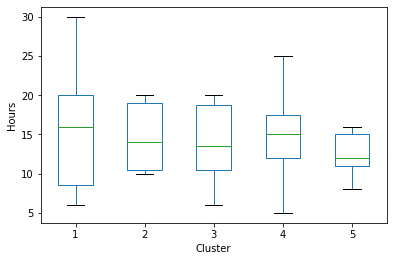

In [24]:
df_bt3.boxplot(grid=False, column='battery_hours', by='cluster', showfliers=False)
plt.title('')
plt.suptitle('')
plt.xlabel('Cluster')
plt.ylabel('Hours')
plt.savefig('battery_hours.png', dpi=300)    
plt.show()

# low/volume

In [25]:
df_vo = df_fsp_n2[df_fsp_n2['feature'] == 'low/volume']

df_vo['count'] = df_vo.groupby('product_name')['product_name'].transform('count')
df_vo_weight = df_vo

df_vo.drop_duplicates(subset='product_name', inplace=True)
df_vo = df_vo.sort_values('count', ascending=False).groupby('cluster').head(10).sort_values('cluster')
df_vo.reset_index(drop=True, inplace=True)

In [26]:
df_raw = pd.read_csv('review_raw.csv')
df_raw.rename(columns={"product_page": "product_name", "product_page-href": "url"}, inplace=True)
df_raw = df_raw[['product_name', 'url']]
df_raw.drop_duplicates(subset='product_name', inplace=True)

In [27]:
df_vo2 = df_vo.merge(df_raw, on='product_name')
#for i in df_vo2['url']:
    #idx = df_vo2[df_vo2['url'] == i].index
    #print(f'{idx}: {i}')

In [28]:
data_vo = (12, 3, 14, 6, 9, 1.5, 3, 5, 3, 20,
           12, 25, 10, 40, 40, 40, 20, 30, 16, 25,
           16, 6, 30, 30, 15, 60, 12, 10, 4, 3,
           60, 5, 17, 3, 30, 17, 10, 40,
           40, 40, 30, 50)

In [29]:
df_vo3 = df_vo2[['cluster', 'price', 'product_name', 'url', 'count']]
df_vo3['watts'] = data_vo

In [30]:
df_vo3.loc[df_vo3.cluster == 'c1', 'cluster'] = 1
df_vo3.loc[df_vo3.cluster == 'c2', 'cluster'] = 2
df_vo3.loc[df_vo3.cluster == 'c3', 'cluster'] = 3
df_vo3.loc[df_vo3.cluster == 'c4', 'cluster'] = 4
df_vo3.loc[df_vo3.cluster == 'c5', 'cluster'] = 5

In [31]:
df_vo3.sort_values(by=['cluster','count'], ascending=[True,False], inplace=True)
df_vo3.head()

,cluster,price,product_name,url,count,watts
0,1,23.75,DOSS SoundBox Touch Portable Wireless Bluetoot...,https://www.amazon.com/DOSS-Wireless-Bluetooth...,27,12.0
1,1,14.99,SoundBot SB510 HD Water Resistant Bluetooth 3....,https://www.amazon.com/SB510-Resistant-Bluetoo...,21,3.0
2,1,39.99,OontZ Angle 3 Ultra Waterproof 5.0 Bluetooth S...,https://www.amazon.com/OontZ-Angle-Ultra-Hi-Qu...,20,14.0
3,1,18.99,"ZoeeTree S1 Wireless Bluetooth Speaker, Portab...",https://www.amazon.com/ZoeeTree-S1-Wireless-Bl...,18,6.0
4,1,23.95,iHome Bluetooth Rechargeable Mini Speaker Cube...,https://www.amazon.com/iHome-Bluetooth-Recharg...,16,9.0


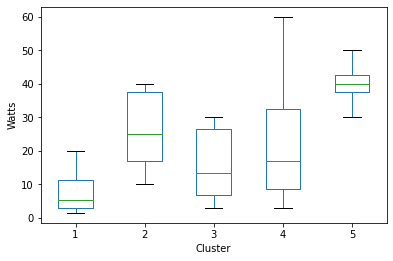

In [32]:
df_vo3.boxplot(grid=False, column='watts', by='cluster', showfliers=False)
plt.title('')
plt.suptitle('')
plt.xlabel('Cluster')
plt.ylabel('Watts')
plt.savefig('watts.png', dpi=300)    
plt.show()